In [1]:
import tensorflow as tf
import keras
import os, re, glob, cv2, numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
dirs = os.listdir('input2/train') 
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: 
    count = 0
    for pic in glob.glob('input2/train/'+i+'/*'):
        im = cv2.imread(pic) 
        im = cv2.resize(im,(100,100))
        im = np.array(im) 
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10): 
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X_train = np.array(X)
y_train = np.array(y)

Jumlah Mobil_Hitam : 500
Jumlah Mobil_Putih : 500
Jumlah Mobil_Silver : 500
Jumlah Mobil_Abu_Abu : 500


In [4]:
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.20, random_state=20)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1600, 100, 100, 3)
(1600, 4)
(400, 100, 100, 3)
(400, 4)


In [6]:
# Model
def convModel():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3))) 
#     model.add(Conv2D(32, (3, 3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2))) 

    model.add(Conv2D(64, (3, 3), activation='relu')) 
#     model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Dropout(0.50))

    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.50))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.50))
    model.add(Dense(4, activation='softmax'))
    
    return model


In [7]:
ModelCheckpoint = ModelCheckpoint('ModelCheckpoint/model_wight_check_baru_adam_epoch20_best11.h5',  
                             monitor='val_loss',
                             save_weights_only=False,
                             verbose=0,
                             save_best_only= True,
                             mode='auto')

In [8]:
# COMPILE
epochs = 20
batch_size = 32
lrate = 0.0001
# lrate=1.0e-4
model = convModel()
adam = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 19, 19, 128)      

In [9]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=epochs, 
                    batch_size=batch_size,
                    callbacks=[ModelCheckpoint],
                    verbose=1)

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 7s 5ms/step - loss: 1.3919 - accuracy: 0.2562 - val_loss: 1.3741 - val_accuracy: 0.3400
Epoch 2/20
1600/1600 [==============================] - 4s 3ms/step - loss: 1.2732 - accuracy: 0.3981 - val_loss: 1.1337 - val_accuracy: 0.4800
Epoch 3/20
1600/1600 [==============================] - 4s 3ms/step - loss: 1.1524 - accuracy: 0.4775 - val_loss: 1.1767 - val_accuracy: 0.4700
Epoch 4/20
1600/1600 [==============================] - 5s 3ms/step - loss: 1.0519 - accuracy: 0.5069 - val_loss: 1.1260 - val_accuracy: 0.4925
Epoch 5/20
1600/1600 [==============================] - 5s 3ms/step - loss: 1.0036 - accuracy: 0.5506 - val_loss: 0.9711 - val_accuracy: 0.5575
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.9546 - accuracy: 0.5625 - val_loss: 0.8470 - val_accuracy: 0.6200
Epoch 7/20
1600/1600 [==============================] - 4s 3ms/step - loss: 0.8711 - accu

In [10]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 73.00%


In [11]:
hist_df = pd.DataFrame(history.history) 
hist_df.to_excel('History/Val2.xlsx', index=True)

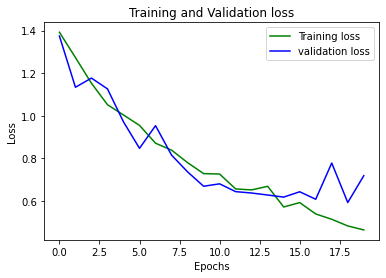

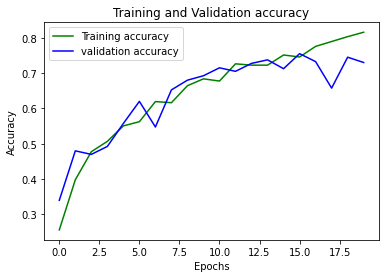

<Figure size 432x288 with 0 Axes>

In [12]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('TrainingValidationLoss.jpeg')

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('TrainingValidationAccuracy.jpeg')

In [13]:
# ITERASI X_TEST
y_pred = model.predict(x_test)
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_prediction_n.append(index_n)
    y_test_n.append(index_m)

In [14]:
#CLASSIFICATION REPORT
print(classification_report(y_test_n, y_prediction_n, target_names=["Hitam","Putih","Silver","ABU"]))

              precision    recall  f1-score   support

       Hitam       0.97      0.67      0.79       112
       Putih       0.84      0.82      0.83       100
      Silver       0.65      0.69      0.67        94
         ABU       0.56      0.74      0.64        94

    accuracy                           0.73       400
   macro avg       0.76      0.73      0.73       400
weighted avg       0.77      0.73      0.74       400



In [15]:
y_pred = model.predict_classes(x_test)
# y_pred

In [16]:
y_test_class = np.argmax(y_test, axis=1)
# y_test_class

In [17]:
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.73


array([[75,  0,  0, 37],
       [ 0, 82, 15,  3],
       [ 0, 14, 65, 15],
       [ 2,  2, 20, 70]])

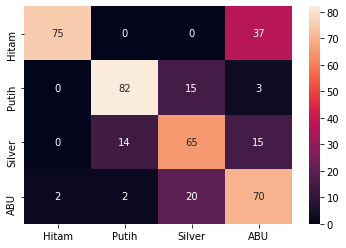

In [18]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["Hitam","Putih","Silver","ABU"], yticklabels=["Hitam","Putih","Silver","ABU"])

In [19]:
# checkpoint_path = 'ModelCheckpoint/model_wight_check.h5'
# checkpoint_dir = os.path.dirname(checkpoint_path)
# model = load_model(checkpoint_path)
# model.load_weights(checkpoint_path)

# ModelCheckpoint = ModelCheckpoint(checkpoint_dir,  # model filename
#                              monitor='val_loss', # quantity to monitor
#                              save_weights_only=False,
#                              verbose=0, # verbosity - 0 or 1
#                              save_best_only= True, # The latest best model will not be overwritten
#                              mode='auto') # The decision to overwrite model is made 
                                     
# history = model.fit(x_train, y_train, 
#                     validation_data=(x_test, y_test), 
#                     epochs=20, 
#                     batch_size=16,
#                     callbacks=[ModelCheckpoint],
#                     verbose=1)


# loss_train = history.history['loss']
# loss_val = history.history['val_loss']
# epochs = range(0,20)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()
# plt.savefig('TrainingValidationLoss.png')

# loss_train = history.history['accuracy']
# loss_val = history.history['val_accuracy']
# epochs = range(0,20)
# plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# plt.plot(epochs, loss_val, 'b', label='validation accuracy')
# plt.title('Training and Validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()
# plt.savefig('TrainingValidationAccuracy.png')

# model.load_weights(checkpoint_path)
# loss,acc = model.evaluate(x_test,  y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [20]:
# y_pred = model.predict(x_test)
# # len(y_pred)
# # ITERASI X_TEST
# y_prediction_n = []
# y_test_n = []
# for i in range(0, len(y_pred)):
#     max_n = max(y_pred[i])
#     max_m = max(y_test[i])
#     index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
#     index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
#     y_prediction_n.append(index_n)
#     y_test_n.append(index_m)
    
# #CLASSIFICATION REPORT
# print(classification_report(y_test_n, y_prediction_n, target_names=["Hitam","Putih","Silver","ABU"]))
# y_pred = model.predict_classes(x_test)
# y_test_class = np.argmax(y_test, axis=1)
# print(accuracy_score(y_test_class, y_pred))
# confusion_matrix(y_test_class, y_pred)
# cm = confusion_matrix(y_test_class, y_pred)
# sn.heatmap(cm, annot=True, xticklabels=["Hitam","Putih","Silver","ABU"], yticklabels=["Hitam","Putih","Silver","ABU"])

